## Lección 06 Imputación de nulos

### Ejercicios

In [13]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

1. Cargad el csv que obtuvimos en los ejercicios de la clase invertida de ayer.

In [14]:
df_leccion_nulos=pd.read_csv('post_leccion04_rating_insight.csv', index_col=0)
df_leccion_nulos.head(1)

,index,title,price,retail_price,price_difference,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_url,product_id,crawl_month,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,average_discount,mean_discount,mean_product_ratings_count
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,2.0,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,0,34,50,CN,zgrdejia,NaN,568,4.128521,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,2020-08,2,120000,60000.0,4.219,320031.0,9.0,20.0,54.0,54.0,8836.0


2. ¿Qué columnas tienen nulos?

In [15]:
#Veo todas las columnas que tienen nulos y cuántos son
col_null=df_leccion_nulos.isnull().sum()[df_leccion_nulos.isnull().sum()>0]
col_null

rating_five_count             26
rating_four_count             26
rating_three_count            26
rating_two_count              26
rating_one_count              26
product_color                 21
product_variation_size_id      9
origin_country                10
merchant_name                  2
merchant_info_subtitle       184
dtype: int64

In [16]:
#Calculo qué % representan sobre el total de valores de cada columna
percentage_null=(df_leccion_nulos.isnull().sum() / df_leccion_nulos.shape[0])*100
percentage_null=pd.DataFrame(percentage_null[percentage_null>0], columns=['% nulos'])
percentage_null

,% nulos
rating_five_count,2.713987
rating_four_count,2.713987
rating_three_count,2.713987
rating_two_count,2.713987
rating_one_count,2.713987
product_color,2.192067
product_variation_size_id,0.939457
origin_country,1.043841
merchant_name,0.208768
merchant_info_subtitle,19.206681


3. Explorad los nulos que hay en el DataFrame.
4. Con lo aprendido en la lección de hoy gestiona los nulos de la forma que consideres más correcta. Mañana en clase discutiremos sobre los métodos elegidos.

#### Columnas categóricas
1. Quiero saber qué columnas categóricas tienen nulos, que % del total representan esos nulos y cómo están distribuidos los valores no nulos.

In [17]:
#Ahora quiero ver las columnas categóricas que tienen nulos y qué % representan sobre el total
#1. Guardo las columnas categóricas con nulos en una variable
col_cate_null=df_leccion_nulos[df_leccion_nulos.columns[df_leccion_nulos.isnull().any()]].select_dtypes(include='O').columns
col_cate_null

Index(['product_color', 'product_variation_size_id', 'origin_country',
       'merchant_name', 'merchant_info_subtitle'],
      dtype='object')

In [18]:
#2. Veo qué % de nulos tiene cada una
#Al aplicar .isnull() convierte cada valor en un boolean (Nan es True, y no nulo es False).
#Ahora los valores son boolean, por lo que .mean() trata True como 1 y False como 0, por tanto .mean() calcula la proporción de True (valores nuloes) en cada columna
col_cate_null_percen=df_leccion_nulos[col_cate_null].isnull().mean()*100
col_cate_null_percen

product_color                 2.192067
product_variation_size_id     0.939457
origin_country                1.043841
merchant_name                 0.208768
merchant_info_subtitle       19.206681
dtype: float64

In [19]:
#3. Ahora quiero saber cómo está distribuida cada una de esas columnas, cuánto % de cada valor único tienen.
#Hago un for de value_counts
for i in col_cate_null:
    print(f'-------------\nColumna {i.upper()}')
    display(df_leccion_nulos[i].value_counts() / df_leccion_nulos.shape[0])

-------------
Columna PRODUCT_COLOR


black           0.187891
white           0.159708
yellow          0.069937
blue            0.068894
pink            0.065762
                  ...   
claret          0.001044
pink & white    0.001044
tan             0.001044
wine red        0.001044
whitestripe     0.001044
Name: product_color, Length: 83, dtype: float64

-------------
Columna PRODUCT_VARIATION_SIZE_ID


S         0.426931
XS        0.217119
M         0.129436
XXS       0.054280
L         0.029228
            ...   
S..       0.001044
30 cm     0.001044
5XL       0.001044
Size M    0.001044
25-S      0.001044
Name: product_variation_size_id, Length: 72, dtype: float64

-------------
Columna ORIGIN_COUNTRY


CN    0.964509
US    0.018789
VE    0.003132
SG    0.002088
AT    0.001044
Name: origin_country, dtype: float64

-------------
Columna MERCHANT_NAME


sjhdstoer                      0.007307
greatexpectationstechnology    0.007307
sangboostore                   0.007307
广州唯适唯服饰有限公司                    0.006263
sklioppp                       0.006263
                                 ...   
abcdyyy                        0.001044
xiaoxia0914                    0.001044
fomalhautjewelry               0.001044
alicadubecka                   0.001044
frome                          0.001044
Name: merchant_name, Length: 670, dtype: float64

-------------
Columna MERCHANT_INFO_SUBTITLE


86 % avis positifs                 0.091858
85 % avis positifs                 0.082463
88 % avis positifs                 0.065762
84 % avis positifs                 0.062630
87 % avis positifs                 0.062630
                                     ...   
คำติชมเชิงบวก 83%                  0.001044
83% Feedback positivo              0.001044
88% retroalimentación positiva     0.001044
86% Positive Feedback              0.001044
74 % avis positifs                 0.001044
Name: merchant_info_subtitle, Length: 61, dtype: float64

2. Defino qué regla voy a seguir para cada una de esas columnas:

- product_color ➡️ unknown
- product_variation_size_id ➡️ moda
- origin_country ➡️ moda
- merchant_name ➡️ unknown
- merchant_info_subtitle ➡️ unknown

In [20]:
#Voy a reemplazar los nulos de las columnas categóricas.
#1. Creo una variable con las columnas por tipo de sustitución de datos
col_unknown=['product_color', 'merchant_name', 'merchant_info_subtitle']
col_moda=['product_variation_size_id', 'origin_country']

#2. Hago un for para cada cambio
for i in col_unknown:
    df_leccion_nulos[i]=df_leccion_nulos[i].fillna('unknown')

for i in col_moda:
    moda=df_leccion_nulos[i].mode()[0]
    df_leccion_nulos[i]=df_leccion_nulos[i].fillna(moda)

#### Columnas numéricas
1. Quiero saber qué columnas numéricas tienen nulos, que % del total representan esos nulos y cómo están distribuidos los valores no nulos.

In [21]:
#Ahora quiero ver las columnas numéricas que tienen nulos y qué % representan sobre el total
#1. Guardo las columnas numéricas con nulos en una variable
col_num_null=df_leccion_nulos[df_leccion_nulos.columns[df_leccion_nulos.isnull().any()]].select_dtypes(include=np.number).columns
col_num_null

Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count'],
      dtype='object')

In [22]:
#2. Veo qué % de nulos tiene cada una
#Al aplicar .isnull() convierte cada valor en un boolean (Nan es True, y no nulo es False).
#Ahora los valores son boolean, por lo que .mean() trata True como 1 y False como 0, por tanto .mean() calcula la proporción de True (valores nuloes) en cada columna
col_num_null_percen=df_leccion_nulos[col_num_null].isnull().mean()*100
col_num_null_percen

rating_five_count     2.713987
rating_four_count     2.713987
rating_three_count    2.713987
rating_two_count      2.713987
rating_one_count      2.713987
dtype: float64

In [23]:
#3. Ahora quiero saber cómo está distribuida cada una de esas columnas, cuánto % de cada valor único tienen.
#Hago un for de value_counts
for i in col_num_null:
    print(f'-------------\nColumna {i.upper()}')
    display(df_leccion_nulos[i].value_counts() / df_leccion_nulos.shape[0])

-------------
Columna RATING_FIVE_COUNT


3.0       0.035491
5.0       0.035491
1.0       0.029228
2.0       0.027140
0.0       0.021921
            ...   
210.0     0.001044
130.0     0.001044
351.0     0.001044
2089.0    0.001044
7337.0    0.001044
Name: rating_five_count, Length: 444, dtype: float64

-------------
Columna RATING_FOUR_COUNT


0.0       0.061587
1.0       0.060543
2.0       0.039666
3.0       0.038622
4.0       0.035491
            ...   
850.0     0.001044
103.0     0.001044
250.0     0.001044
468.0     0.001044
2647.0    0.001044
Name: rating_four_count, Length: 332, dtype: float64

-------------
Columna RATING_THREE_COUNT


0.0       0.090814
1.0       0.053236
2.0       0.051148
5.0       0.032359
3.0       0.032359
            ...   
1148.0    0.001044
358.0     0.001044
230.0     0.001044
327.0     0.001044
1643.0    0.001044
Name: rating_three_count, Length: 303, dtype: float64

-------------
Columna RATING_TWO_COUNT


0.0      0.125261
1.0      0.104384
2.0      0.054280
3.0      0.038622
4.0      0.027140
           ...   
469.0    0.001044
162.0    0.001044
189.0    0.001044
287.0    0.001044
623.0    0.001044
Name: rating_two_count, Length: 213, dtype: float64

-------------
Columna RATING_ONE_COUNT


0.0      0.079332
1.0      0.067850
2.0      0.045929
3.0      0.042797
4.0      0.038622
           ...   
52.0     0.001044
168.0    0.001044
882.0    0.001044
440.0    0.001044
630.0    0.001044
Name: rating_one_count, Length: 260, dtype: float64

2. Busco valores atípicos para poder decidir cómo reemplezaré los nulos.

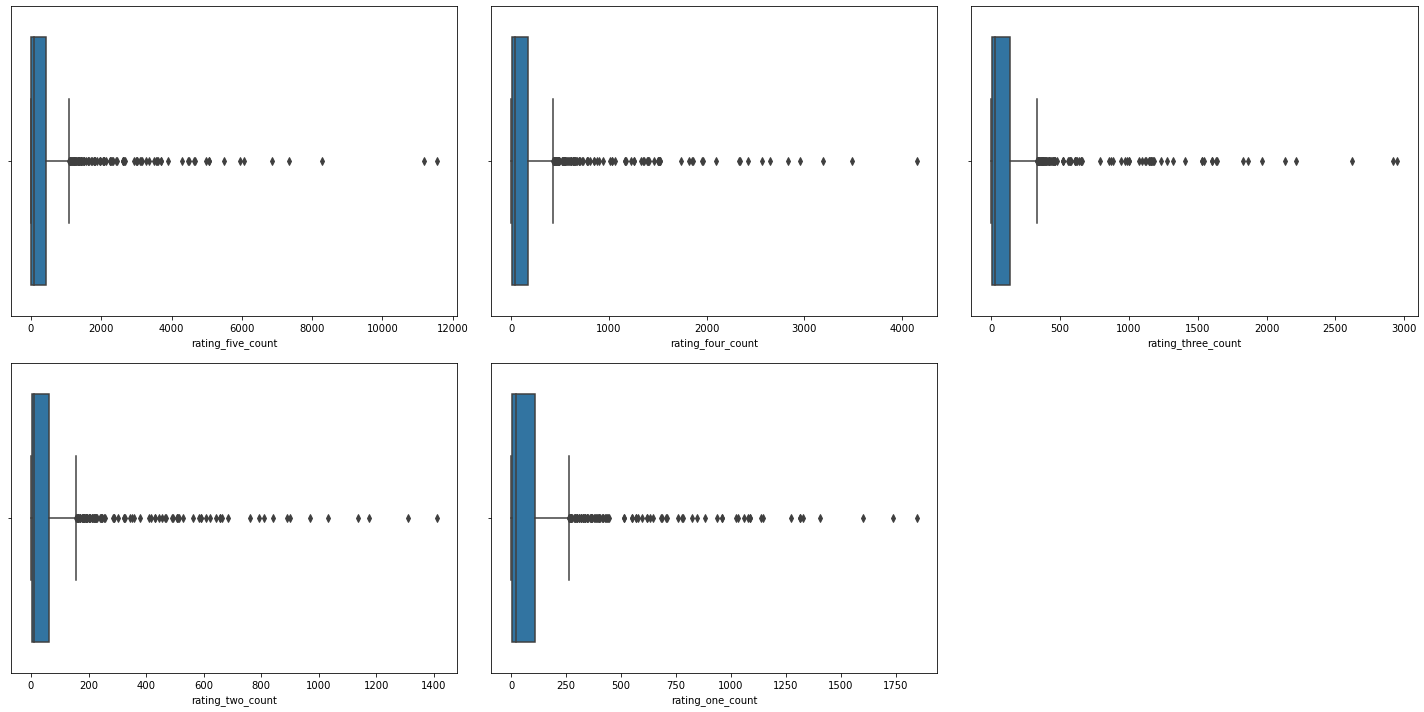

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(col_num_null):
    sns.boxplot(x = col, data = df_leccion_nulos, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1])

2. Voy a aplicar `IterativeImputer` y `KNNImputer` para comparar los resultados y decidir cuál es la mejor opción.

In [25]:
#Aplico IterativeImputer
#Creo el imputer
imputer=IterativeImputer(max_iter=20, random_state=42)
#Transformo los datos
imputado_ii=imputer.fit_transform(df_leccion_nulos[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']])
#Aplico a las columnas (creo nuevas para poder comparar el rdo con KNN)
df_leccion_nulos[['rating_five_ii', 'rating_four_ii', 'rating_three_ii', 'rating_two_ii', 'rating_one_ii']]=imputado_ii
#Compruebo que no quedan nulos
df_leccion_nulos[['rating_five_ii', 'rating_four_ii', 'rating_three_ii', 'rating_two_ii', 'rating_one_ii']].isnull().sum()


rating_five_ii     0
rating_four_ii     0
rating_three_ii    0
rating_two_ii      0
rating_one_ii      0
dtype: int64

In [26]:
#Aplico KNNImputer
#Creo el imputer
imputer=KNNImputer(n_neighbors=5)
#Transformo los datos
imputado_knn=imputer.fit_transform(df_leccion_nulos[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']])
#Aplico a las columnas (creo nuevas para poder comparar el rdo con IterativeImputer)
df_leccion_nulos[['rating_five_knn', 'rating_four_knn', 'rating_three_knn', 'rating_two_knn', 'rating_one_knn']]=imputado_knn
#Compruebo que no quedan nulos
df_leccion_nulos[['rating_five_knn', 'rating_four_knn', 'rating_three_knn', 'rating_two_knn', 'rating_one_knn']].isnull().sum()


rating_five_knn     0
rating_four_knn     0
rating_three_knn    0
rating_two_knn      0
rating_one_knn      0
dtype: int64

In [27]:
#Comparo con un .describe()
df_leccion_nulos[['rating_five_count', 'rating_five_ii',  'rating_five_knn', 'rating_four_count', 'rating_four_ii', 'rating_four_knn', 'rating_three_count', 'rating_three_ii', 'rating_three_knn', 'rating_two_count', 'rating_two_ii', 'rating_two_knn', 'rating_one_count', 'rating_one_ii','rating_one_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating_five_count,932.0,459.136266,1030.990506,0.0,11.0,85.0,441.000000,11548.0
rating_five_ii,958.0,459.136266,1016.888973,0.0,12.0,92.0,459.136266,11548.0
rating_five_knn,958.0,459.136266,1016.888973,0.0,12.0,92.0,459.136266,11548.0
rating_four_count,932.0,187.835837,413.334583,0.0,5.0,34.5,174.500000,4152.0
rating_four_ii,958.0,187.835837,407.681135,0.0,5.0,37.5,187.835837,4152.0
rating_four_knn,958.0,187.835837,407.681135,0.0,5.0,37.5,187.835837,4152.0
rating_three_count,932.0,142.216738,317.937412,0.0,4.0,26.0,135.000000,2951.0
rating_three_ii,958.0,142.216738,313.588773,0.0,4.0,28.5,142.216738,2951.0
rating_three_knn,958.0,142.216738,313.588773,0.0,4.0,28.5,142.216738,2951.0
rating_two_count,932.0,67.221030,150.257103,0.0,2.0,12.0,64.250000,1410.0


3. Conclusión: veo que puedo utlizar tando `IterativeImputer`como `KNNImputer` porque, en este caso, ambos devuelven las mismas medias y medianas.

#### Elimino las columnas sobrantes y renombro las elegidas.

In [28]:
df_leccion_nulos.drop(['rating_five_count', 'rating_five_knn', 'rating_four_count', 'rating_four_knn', 'rating_three_count', 'rating_three_knn', 'rating_two_count', 'rating_two_knn', 'rating_one_count','rating_one_knn'], axis=1, inplace=True)
df_leccion_nulos.head(1)

,index,title,price,retail_price,price_difference,units_sold,uses_ad_boosts,rating_x,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_url,product_id,crawl_month,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,average_discount,mean_discount,mean_product_ratings_count,rating_five_ii,rating_four_ii,rating_three_ii,rating_two_ii,rating_one_ii
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,2.0,100,0,3.76,54,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,0,34,50,CN,zgrdejia,unknown,568,4.128521,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,2020-08,2,120000,60000.0,4.219,320031.0,9.0,20.0,54.0,54.0,8836.0,26.0,8.0,10.0,1.0,9.0


In [29]:
new_columns={'rating_five_ii':'rating_five',
             'rating_four_ii':'rating_four',
             'rating_three_ii':'rating_three',
             'rating_two_ii':'rating_two',
             'rating_one_ii':'rating_one'}

df_leccion_nulos.rename(columns=new_columns, inplace=True)
df_leccion_nulos.head(1)

,index,title,price,retail_price,price_difference,units_sold,uses_ad_boosts,rating_x,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_url,product_id,crawl_month,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,average_discount,mean_discount,mean_product_ratings_count,rating_five,rating_four,rating_three,rating_two,rating_one
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,2.0,100,0,3.76,54,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,0,34,50,CN,zgrdejia,unknown,568,4.128521,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,2020-08,2,120000,60000.0,4.219,320031.0,9.0,20.0,54.0,54.0,8836.0,26.0,8.0,10.0,1.0,9.0


5. Guardad el csv para los ejercicios de la clase invertida de mañana con las columnas sin nulos.

In [30]:
df_leccion_nulos.to_csv("post_leccion06_rating_insight.csv")